In [1]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [ ]:
# only run once, then restart session and comment the next 3 lines
!pip install s3fs -U
!pip install zarr xarray[complete] -U

In [2]:
# remote zarr dataset
dataset_name="acorn_gridded_qc_turq"
url = f's3://imos-data-lab-optimised/parquet/loz_test/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

<xarray.Dataset> Size: 13MB
Dimensions:               (I: 60, J: 59, TIME: 111)
Coordinates:
  * I                     (I) int32 240B 1 2 3 4 5 6 7 ... 54 55 56 57 58 59 60
  * J                     (J) int32 236B 1 2 3 4 5 6 7 ... 53 54 55 56 57 58 59
    LATITUDE              (I, J) float64 28kB dask.array<chunksize=(59, 59), meta=np.ndarray>
    LONGITUDE             (I, J) float64 28kB dask.array<chunksize=(59, 59), meta=np.ndarray>
  * TIME                  (TIME) datetime64[ns] 888B 2023-01-01 ... 2023-01-0...
Data variables:
    GDOP                  (I, J) float32 14kB dask.array<chunksize=(59, 59), meta=np.ndarray>
    NOBS1                 (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    NOBS2                 (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    UCUR                  (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    UCUR_quality_control  (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    UCUR_sd               (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    VCUR                  (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    VCUR_quality_control  (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    VCUR_sd               (TIME, I, J) float32 2MB dask.array<chunksize=(1, 59, 59), meta=np.ndarray>
    filename              (TIME) <U53 24kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      The IMOS Ocean Radar Facility (previously ...
    acknowledgement:               Any users (including re-packagers) of IMOS...
    author:                        Cosoli, Simone; Hetzel, Yasha
    author_email:                  simone.cosoli@uwa.edu.au; yasha.hetzel@uwa...
    citation:                      The citation in a list of references is: I...
    ...                            ...
    source:                        Terrestrial HF radar
    ssr_Stations:                  Lancelin (LANC), Green Head (GHED)
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2023-01-05T14:00:00Z
    time_coverage_start:           2023-01-05T14:00:00Z
    title:                         IMOS Ocean Radar Facility Turqoise Coast (...

In [3]:
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import matplotlib.pyplot as plt
import numpy as np

def acorn_plot(ds, time_start):
    """
    Plotting function for ACORN data.

    Parameters:
    - ds: xarray dataset
        The input dataset.
    - time_start: str
        The starting time in the format '2021-02-21T01:00:00'.
    """
    # Create a 3x2 grid of subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

    # Plot data on each subplot. We're plotting the next 6 time stamps (requiring obviously that they all exist)
    ii = 0
    iTime = list(ds.TIME.values).index(ds.sel(TIME=time_start , method='nearest').TIME)
    cbar_ax = fig.add_axes([0.99, 0.1, 0.02, 0.8])  # Adjust the position and size of the colorbar

    for i in range(3):
        for j in range(2):
            uData = ds.UCUR[iTime + ii, :, :]
            vData = ds.VCUR[iTime + ii, :, :]
            speed = np.sqrt(uData**2 + vData**2)
            lonData = ds.LONGITUDE.values
            latData = ds.LATITUDE.values

            p = axes[i, j].pcolor(lonData, latData, speed)
            axes[i, j].quiver(lonData, latData, uData, vData, units='width')
            axes[i, j].set_title(f'{np.datetime_as_string(ds.TIME.values[iTime + ii])}')
            ii += 1

    # Add a common colorbar
    fig.colorbar(p, cax=cbar_ax, label='Speed')

    # Adjust layout for better appearance
    plt.tight_layout()

    # Show the plot
    plt.show()

/tmp/ipykernel_326683/3812428762.py:31: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  p = axes[i, j].pcolor(lonData, latData, speed)
/tmp/ipykernel_326683/3812428762.py:31: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  p = axes[i, j].pcolor(lonData, latData, speed)
/tmp/ipykernel_326683/3812428762.py:31: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  p = axes[i, j].pcolor(lonData, latData, speed)
/tmp/ip

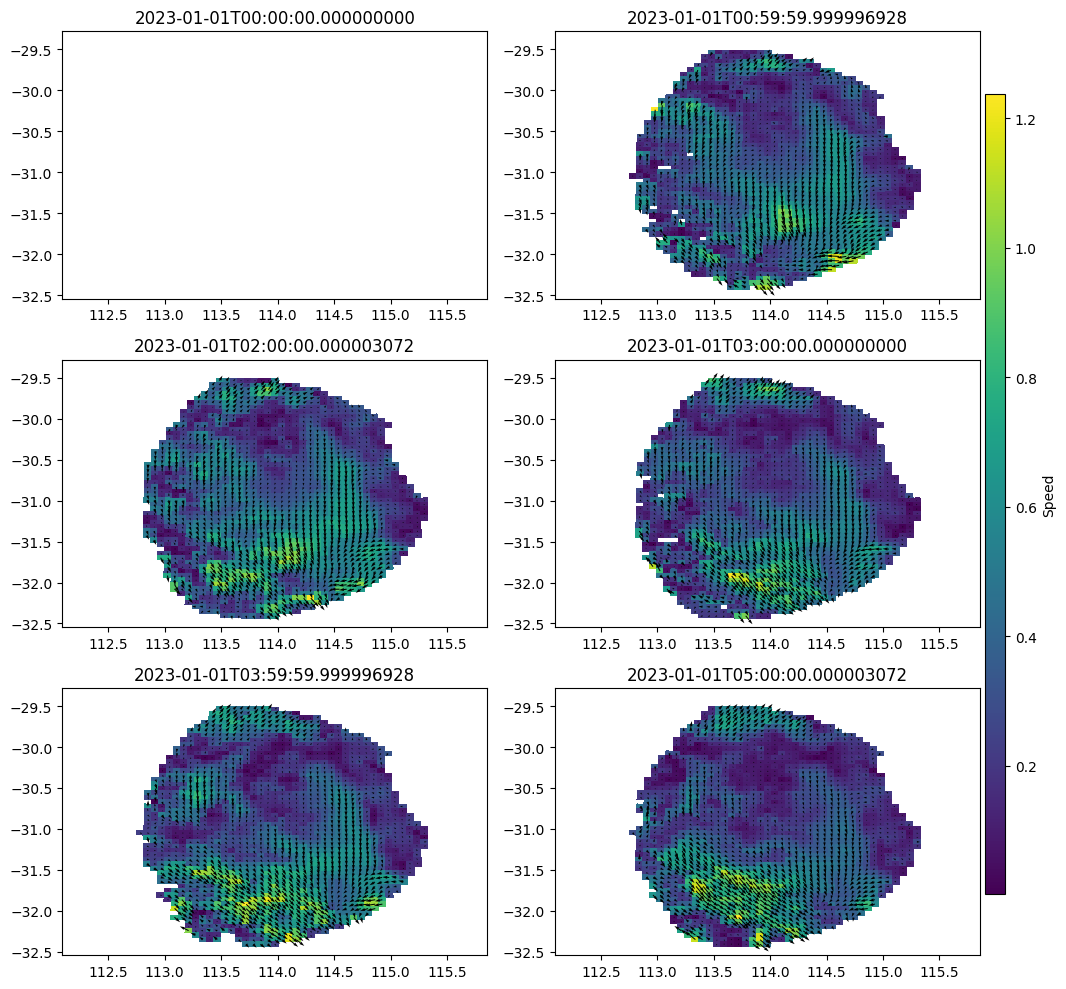

CPU times: user 2.4 s, sys: 78.4 ms, total: 2.48 s
Wall time: 3.8 s


In [4]:
%%time
acorn_plot(ds, '2023-01-01T00:00:00')